In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
flights = pd.read_csv('C:/bts_master/Data_Driven/second/final_data.csv')

In [3]:
flights.head()

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ARRIVAL_DELAY,departure_hour,arrival_hour,ORIGIN_STATE,DESTINATION_STATE,different_state,airport_size
0,0,1,1,4,AS,-22.0,0,4,AK,WA,y,l
1,1,1,1,4,AA,-9.0,0,7,CA,FL,y,xl
2,2,1,1,4,US,5.0,0,8,CA,NC,y,xl
3,3,1,1,4,AA,-9.0,0,8,CA,FL,y,xl
4,4,1,1,4,AS,-21.0,0,3,WA,AK,y,xl


## We can try to predict any delay superior to zero or we can also divide between a small delay, up to 15 minutes, and a bigger delay, and try to predict those.

In [7]:
flights['delayed'] = flights['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)

In [8]:
flights['delayed2'] = flights['ARRIVAL_DELAY'].apply(lambda x: 2 if x > 15 else (1 if x > 0 else 0))

In [9]:
flights['delayed'].value_counts()[0] / flights.shape[0]

0.64162554000409722

In [72]:
flights.shape[0]

5120563

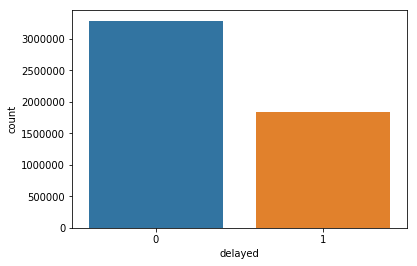

In [10]:
sns.countplot(flights.delayed)

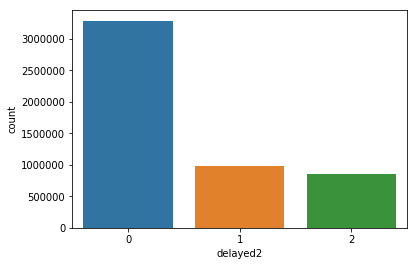

In [11]:
sns.countplot(flights.delayed2)

### Will try to predict any delay larger than zero first:

In [24]:
new = flights.drop(['Unnamed: 0', 'DESTINATION_STATE', 'ARRIVAL_DELAY', 'delayed2'], axis=1)

In [25]:
new = pd.get_dummies(new, columns=['AIRLINE'], drop_first=True)
new = pd.get_dummies(new, columns=['ORIGIN_STATE'], drop_first=True)
new = pd.get_dummies(new, columns=['different_state'], drop_first=True)
new = pd.get_dummies(new, columns=['airport_size'], drop_first=True)
new = pd.get_dummies(new, columns=['DAY_OF_WEEK'], drop_first=True)
new = pd.get_dummies(new, columns=['MONTH'], drop_first=True)
new = pd.get_dummies(new, columns=['DAY'], drop_first=True)

In [26]:
x_data = new.drop('delayed', axis=1)
y_data = new['delayed']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data)

In [28]:
forest = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
forest_pred = forest.predict(X_test)

In [30]:
forest.score(X_test, y_test)

0.64239408002712206

In [31]:
print(classification_report(y_test,forest_pred))

             precision    recall  f1-score   support

          0       0.64      1.00      0.78    821435
          1       0.76      0.00      0.01    458706

avg / total       0.68      0.64      0.50   1280141



In [32]:
print(confusion_matrix(y_test,forest_pred))

[[820996    439]
 [457347   1359]]


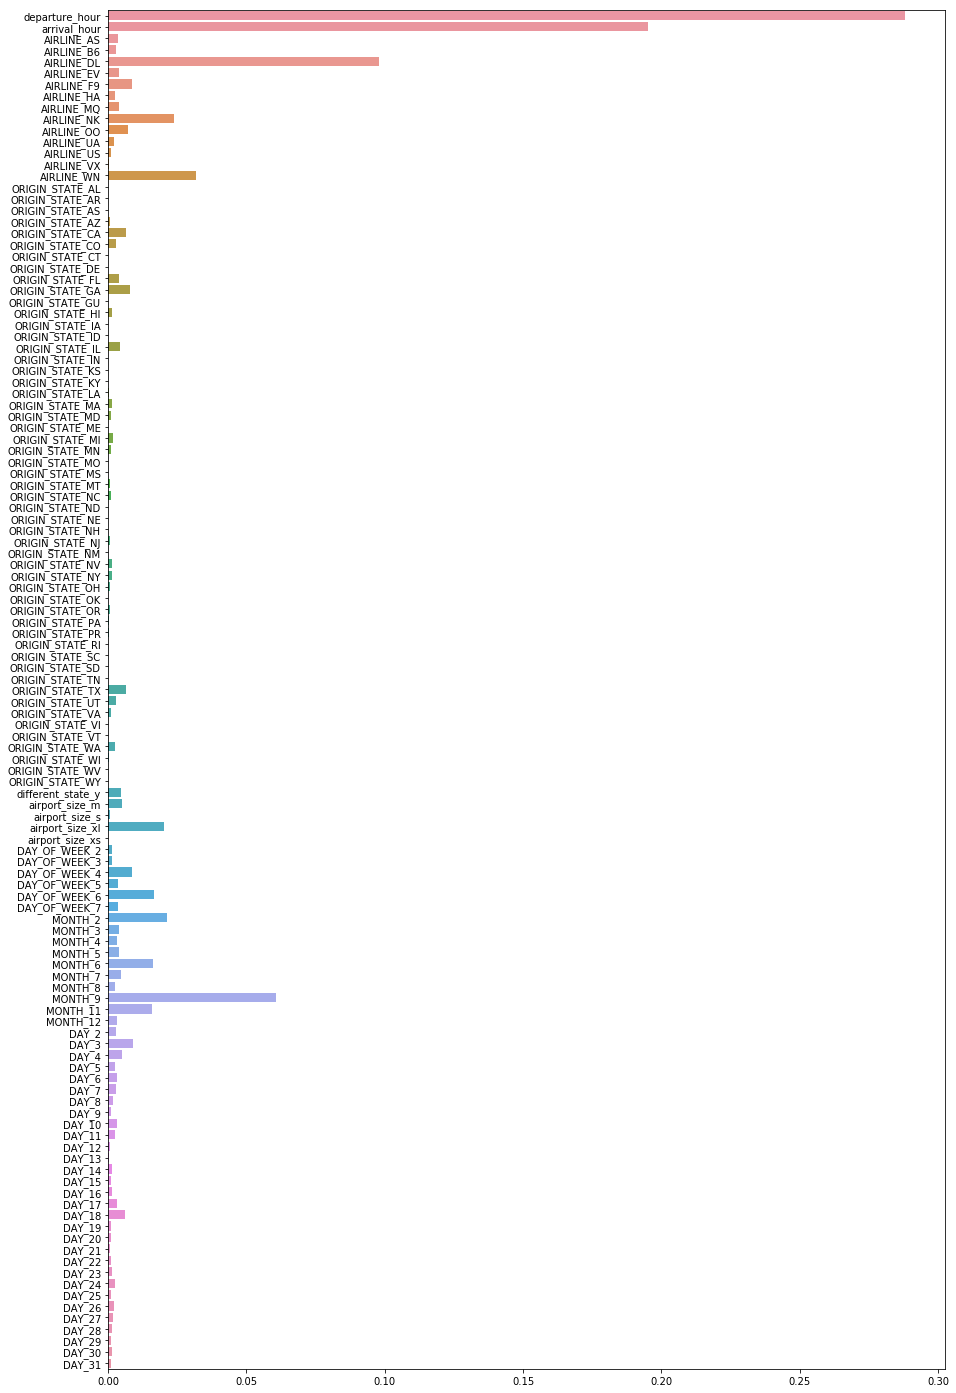

In [34]:
plt.figure(figsize=(15,25))
sns.barplot(y=X_train.columns, x=forest.feature_importances_)

### The prediction is not exactly good

## Trying with neural networks:

In [53]:
new = flights.drop(['Unnamed: 0', 'DESTINATION_STATE', 'ARRIVAL_DELAY', 'delayed2'], axis=1)

In [49]:
new = pd.get_dummies(new, columns=['AIRLINE'], drop_first=True)
new = pd.get_dummies(new, columns=['ORIGIN_STATE'], drop_first=True)
new = pd.get_dummies(new, columns=['different_state'], drop_first=True)
new = pd.get_dummies(new, columns=['airport_size'], drop_first=True)
new = pd.get_dummies(new, columns=['DAY_OF_WEEK'], drop_first=True)
new = pd.get_dummies(new, columns=['MONTH'], drop_first=True)
new = pd.get_dummies(new, columns=['DAY'], drop_first=True)

In [55]:
x_data = new.drop('delayed', axis=1).values
y_data = new['delayed'].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data)

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [63]:
len(X_train[0])

119

In [99]:
classifier = Sequential()
classifier.add(Dense(output_dim = 80, activation="relu", input_dim=119))
classifier.add(Dropout(0.1))
classifier.add(Dense(output_dim = 40, activation="relu"))
classifier.add(Dropout(0.1))
classifier.add(Dense(output_dim = 60, activation="relu"))
classifier.add(Dropout(0.1))
classifier.add(Dense(output_dim = 1, activation="sigmoid"))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=119, units=80)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40)`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=60)`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [100]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
batch_size = 50
epochs = 10
classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
3840422/3840422 [==============================] - 120s 31us/step - loss: 0.6056 - acc: 0.6771
Epoch 2/10
3840422/3840422 [==============================] - 115s 30us/step - loss: 0.6051 - acc: 0.6776
Epoch 3/10
3840422/3840422 [==============================] - 113s 29us/step - loss: 0.6051 - acc: 0.6777
Epoch 4/10
3840422/3840422 [==============================] - 119s 31us/step - loss: 0.6050 - acc: 0.6779
Epoch 5/10
3840422/3840422 [==============================] - 122s 32us/step - loss: 0.6047 - acc: 0.6781
Epoch 6/10
3840422/3840422 [==============================] - 118s 31us/step - loss: 0.6046 - acc: 0.67810s - loss: 0.6046 - acc: 0.6 - ETA: 0s - loss: 0.6046 - acc: 
Epoch 7/10
3840422/3840422 [==============================] - 119s 31us/step - loss: 0.6045 - acc: 0.6782
Epoch 8/10
3840422/3840422 [==============================] - 119s 31us/step - loss: 0.6043 - acc: 0.6783
Epoch 9/10
3840422/3840422 [==============================] - 119s 31us/step - loss: 0.6042

In [115]:
dp_pred = classifier.predict(X_test)

In [116]:
dp_pred

array([[ 0.20184226],
       [ 0.27029929],
       [ 0.38533127],
       ..., 
       [ 0.17141385],
       [ 0.16755976],
       [ 0.31304309]], dtype=float32)

In [117]:
dp_prediction = (dp_pred > 0.5)

In [118]:
print(confusion_matrix(y_test,dp_prediction))

[[741445  79541]
 [327678 131477]]


In [119]:
print(classification_report(y_test,dp_prediction))

             precision    recall  f1-score   support

          0       0.69      0.90      0.78    820986
          1       0.62      0.29      0.39    459155

avg / total       0.67      0.68      0.64   1280141



In [131]:
print('Model accuracy:', (741445+131477)/1280141)

Model accuracy: 0.6818951974821523


### Its Better but its not great 68,2% accuracy

### Now to predict the two types of delays:

In [29]:
new2 = flights.drop(['MONTH', 'DAY', 'DESTINATION_STATE', 'ARRIVAL_DELAY', 'delayed'], axis=1)

In [30]:
new2 = pd.get_dummies(new2, columns=['AIRLINE'], drop_first=True)
new2 = pd.get_dummies(new2, columns=['ORIGIN_STATE'], drop_first=True)
new2 = pd.get_dummies(new2, columns=['different_state'], drop_first=True)
new2 = pd.get_dummies(new2, columns=['airport_size'], drop_first=True)
new2 = pd.get_dummies(new2, columns=['DAY_OF_WEEK'], drop_first=True)

In [31]:
x_data = new2.drop('delayed2', axis=1)
y_data = new2['delayed2']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data)

In [35]:
forest2 = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=7)
forest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
forest_pred2 = forest2.predict(X_test)
forest.score(X_test, y_test)

0.55911965947501097

In [37]:
print(classification_report(y_test,forest_pred2))

             precision    recall  f1-score   support

          0       0.64      1.00      0.78    820755
          1       0.00      0.00      0.00    245461
          2       0.00      0.00      0.00    213925

avg / total       0.41      0.64      0.50   1280141



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
print(confusion_matrix(y_test,forest_pred2))

[[820755      0      0]
 [245461      0      0]
 [213925      0      0]]


### Seems to be useless